# Titanic Data Set Analysis using Logistic Regression

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
train_df = pd.read_csv('titanic_train.csv')
test_df = pd.read_csv('titanic_test.csv')

In [4]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [9]:
train_df.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


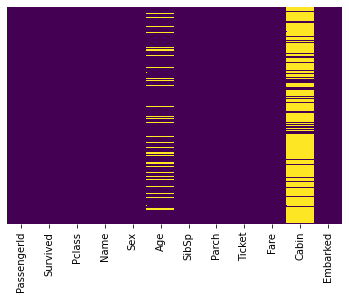

In [14]:
sns.heatmap(train_df.isnull(), yticklabels=False, cbar = False, cmap = 'viridis')

# The yello bars show the distibution of null values so we are missing a lot of Cabin data. 
# Age column has some missing values

In [15]:
sns.set_style("whitegrid")

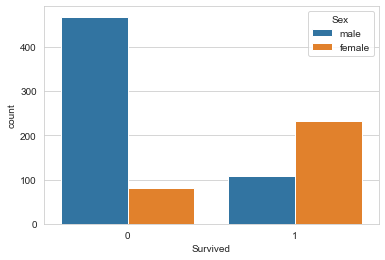

In [18]:
sns.countplot(x= 'Survived', data = train_df, hue='Sex')

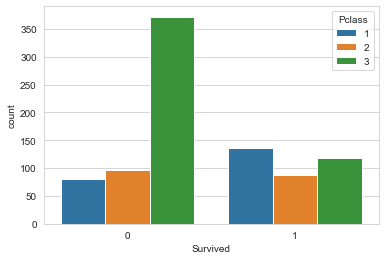

In [19]:
sns.countplot(x= 'Survived', data = train_df, hue='Pclass')
# We can see that survival rate of passenger in 3rd class was the least

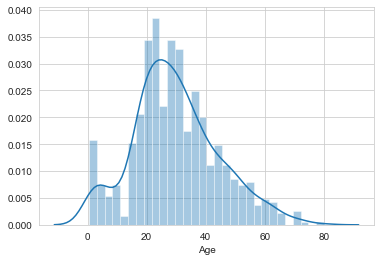

In [21]:
 # This plot takes in an array of values
sns.distplot(train_df['Age'].dropna() , bins = 30)

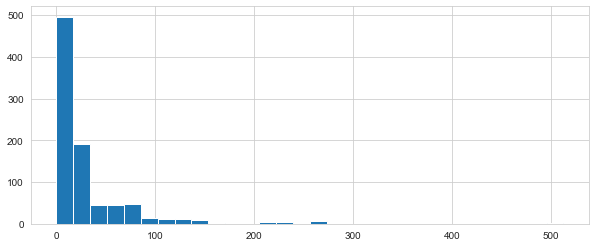

In [24]:
train_df['Fare'].hist(bins = 30, figsize = (10,4))

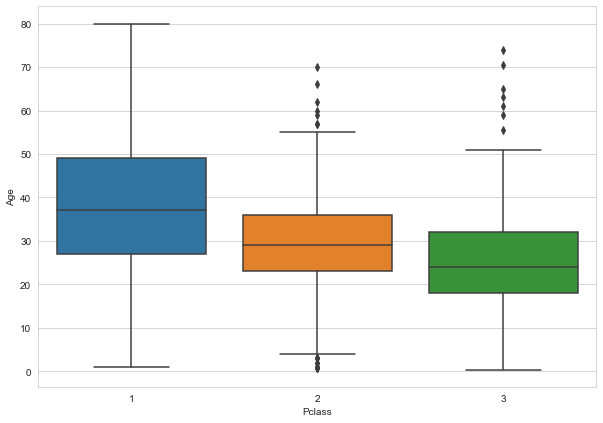

In [28]:
plt.figure(figsize = (10,7))
sns.boxplot(x = train_df.Pclass, y = train_df.Age)


In [85]:
def impute_age(cols):
    age = cols[0]
    pclass = cols[1]
    
    if pd.isnull(age):
        return train_df[train_df['Pclass'] == pclass]['Age'].mean()
    else:
        return age

In [87]:
train_df['Age'] = train_df[['Age', 'Pclass']].apply(impute_age, axis = 1)

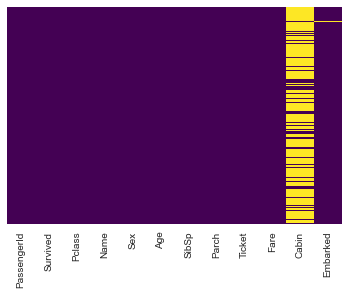

In [96]:
sns.heatmap(train_df.isnull(), yticklabels=False, cmap = 'viridis', cbar = False)

In [97]:
train_df.drop(labels = ['Cabin'], axis= 1, inplace=True)

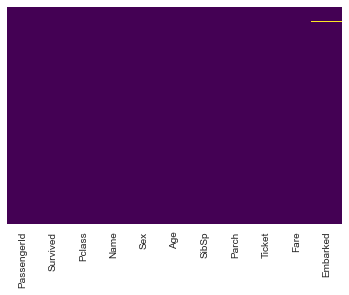

In [98]:
sns.heatmap(train_df.isnull(), yticklabels=False, cmap = 'viridis', cbar = False)

In [99]:
train_df.dropna(inplace=True)

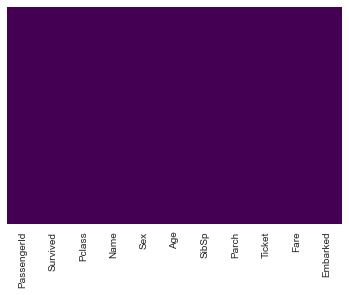

In [100]:
sns.heatmap(train_df.isnull(), yticklabels=False, cmap = 'viridis', cbar = False)

In [104]:
# Change categorical features into dummy variables ex: change Gender column from M or F to 1 or 0
sex = pd.get_dummies(train_df['Sex'], drop_first=True)

In [107]:
embarked = pd.get_dummies(train_df['Embarked'], drop_first=True)
embarked

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1
...,...,...
886,0,1
887,0,1
888,0,1
889,0,0


In [110]:
train = pd.concat([train_df, sex, embarked], axis = 1)
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.00000,1,0,A/5 21171,7.2500,S,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.00000,1,0,PC 17599,71.2833,C,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.00000,0,0,STON/O2. 3101282,7.9250,S,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.00000,1,0,113803,53.1000,S,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.00000,0,0,373450,8.0500,S,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.00000,0,0,211536,13.0000,S,1,0,1
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.00000,0,0,112053,30.0000,S,0,0,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,25.14062,1,2,W./C. 6607,23.4500,S,0,0,1
889,890,1,1,"Behr, Mr. Karl Howell",male,26.00000,0,0,111369,30.0000,C,1,0,0


In [114]:
train.drop(['Sex', 'Embarked', 'Ticket', 'Name'], axis=1, inplace=True)

In [116]:
# The PasserId column is just a numerical sequence so we can drop it
train.drop('PassengerId', axis = 1, inplace=True)

In [117]:
# Implmenting Logistic Regression 
X = train.drop(['Survived'], axis=1)
y = train['Survived']


In [118]:
X.head()

,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,3,22.0,1,0,7.2500,1,0,1
1,1,38.0,1,0,71.2833,0,0,0
2,3,26.0,0,0,7.9250,0,0,1
3,1,35.0,1,0,53.1000,0,0,1
4,3,35.0,0,0,8.0500,1,0,1


In [119]:
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

** Training the model using Logistic Regression from Scikit-Learn package **

In [120]:
from sklearn.model_selection import train_test_split

In [127]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=101)
X_train

,Pclass,Age,SibSp,Parch,Fare,male,Q,S
280,3,65.00000,0,0,7.7500,1,1,0
625,1,61.00000,0,0,32.3208,1,0,1
424,3,18.00000,1,1,20.2125,1,0,1
18,3,31.00000,1,0,18.0000,0,0,1
4,3,35.00000,0,0,8.0500,1,0,1
...,...,...,...,...,...,...,...,...
576,2,34.00000,0,0,13.0000,0,0,1
840,3,20.00000,0,0,7.9250,1,0,1
338,3,45.00000,0,0,8.0500,1,0,1
524,3,25.14062,0,0,7.2292,1,0,0


In [128]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(max_iter=1000)

In [131]:
lr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [132]:
predictions = lr.predict(X_test)

In [133]:
from sklearn.metrics import classification_report

In [135]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.81      0.91      0.85       174
           1       0.84      0.68      0.75       120

    accuracy                           0.82       294
   macro avg       0.82      0.80      0.80       294
weighted avg       0.82      0.82      0.81       294



In [136]:
from sklearn.metrics import confusion_matrix

In [137]:
confusion_matrix(y_test, predictions)

array([[158,  16],
       [ 38,  82]])

In [141]:
# Checking if   the column will make a difference
pclass = pd.get_dummies(train_df['Pclass'], drop_first=True)
pclass

,2,3
0,0,1
1,0,0
2,0,1
3,0,0
4,0,1
...,...,...
886,1,0
887,0,0
888,0,1
889,0,0


** Changing the categorical column "embarked" to numerical and Re - Training the model using Logistic Regression **

In [153]:
embarked.columns = ['embarked_1',' embarked_2']

In [154]:
train_new = pd.concat([train_df, sex, pclass, embarked], axis=1)

In [157]:
train_new.drop(['PassengerId','Pclass', 'Name', 'Sex', 'Embarked', 'Ticket'], axis=1,inplace = True)

In [158]:
train_new

,Survived,Age,SibSp,Parch,Fare,male,2,3,embarked_1,embarked_2
0,0,22.00000,1,0,7.2500,1,0,1,0,1
1,1,38.00000,1,0,71.2833,0,0,0,0,0
2,1,26.00000,0,0,7.9250,0,0,1,0,1
3,1,35.00000,1,0,53.1000,0,0,0,0,1
4,0,35.00000,0,0,8.0500,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...
886,0,27.00000,0,0,13.0000,1,1,0,0,1
887,1,19.00000,0,0,30.0000,0,0,0,0,1
888,0,25.14062,1,2,23.4500,0,0,1,0,1
889,1,26.00000,0,0,30.0000,1,0,0,0,0


In [163]:
X = train_new.drop('Survived', axis = 1)
y = train_new['Survived']
X

,Age,SibSp,Parch,Fare,male,2,3,embarked_1,embarked_2
0,22.00000,1,0,7.2500,1,0,1,0,1
1,38.00000,1,0,71.2833,0,0,0,0,0
2,26.00000,0,0,7.9250,0,0,1,0,1
3,35.00000,1,0,53.1000,0,0,0,0,1
4,35.00000,0,0,8.0500,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...
886,27.00000,0,0,13.0000,1,1,0,0,1
887,19.00000,0,0,30.0000,0,0,0,0,1
888,25.14062,1,2,23.4500,0,0,1,0,1
889,26.00000,0,0,30.0000,1,0,0,0,0


In [164]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=101)

In [165]:
lr_new_model = LogisticRegression(max_iter=1000)
lr_new_model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [167]:
new_predictions = lr_new_model.predict(X_test)

In [169]:
from sklearn.metrics import classification_report
print(classification_report(y_test, new_predictions))

              precision    recall  f1-score   support

           0       0.81      0.91      0.86       174
           1       0.85      0.68      0.76       120

    accuracy                           0.82       294
   macro avg       0.83      0.80      0.81       294
weighted avg       0.82      0.82      0.82       294



In [ ]:
# We can observe that introducing the embarked column did not have a significant impact on the algorithm

In [170]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, new_predictions)

array([[159,  15],
       [ 38,  82]])